In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def elipse(n, m, O, a, b, fill = 1):
    assert isinstance(n, int)
    assert isinstance(m, int)
    assert n > 0 and m > 0
    assert isinstance(O, (list, tuple))
    assert O[0] < m and O[0] > 0
    assert O[1] < n and O[1] > 0
    assert isinstance(a, int)
    assert isinstance(b, int)
#     assert O[0] + b < m, "b value is too big to fit the canvas"
#     assert O[0] - b > 0, "b value is too big to fit the canvas"
#     assert O[1] - a > 0, "a value is too big to fit the canvas"
#     assert O[1] + a < n, "a value is too big to fit the canvas"

    RGB=np.zeros((n, m, 3), dtype = np.uint8)
    RGB[:,:] = 255
    
    x0 = O[0]
    y0 = O[1]
    
    if (a == b):  # okrag
        RGB = circleBresenham(x0, y0, a, RGB)
    else:
        RGB = calculate(x0, y0, a, b, RGB)
    
    if fill == 1:
        RGB = fill_it(x0, y0, a, b, RGB)
    
    return RGB


def circleBresenham(x0, y0, r, RGB):
    # recycling z zajec

    d = 5.0-4*r
    x = 0
    y = r

    deltaA = (-2*r+5)*4
    deltaB = 3*4
    while (x <= y):
        RGB = circle_points(x0, y0, x, y, RGB)
        if d > 0:
            d += deltaA
            y -= 1
            x += 1
            deltaA += 4*4
            deltaB += 2*4

        else:
            d += deltaB
            x += 1
            deltaA += 2*4
            deltaB += 2*4

    return RGB


def circle_points(x0, y0, x, y, RGB):
    # recycling z zajec
        
    RGB[y0-y, x0-x] = 0
    RGB[y0+y, x0-x] = 0
    RGB[y0-y, x0+x] = 0
    RGB[y0+y, x0+x] = 0
    RGB[y0-x, x0-y] = 0
    RGB[y0+x, x0-y] = 0
    RGB[y0-x, x0+y] = 0
    RGB[y0+x, x0+y] = 0
    
    return RGB

    
def fill_it(x0, y0, a, b, RGB):
    for x in range(-b, b+1):
        dy = int(math.sqrt(a**2 * (1 - (x**2)/(b**2))))
        for y in range(-dy, dy+1):
            RGB[y0+y, x0+x] = 0

    return RGB


def calculate(x0, y0, a, b, RGB):
    RGB[y0+a, x0] = 0
    RGB[y0-a, x0] = 0
    RGB[y0, x0+b] = 0
    RGB[y0, x0-b] = 0

    y = 0
    for x in range(1, b):
        y = int(math.sqrt(a**2 * (1 - (x**2)/(b**2))))
        
        if -a * x / (b * math.sqrt(b**2 - x**2)) < -1:
            break

        RGB[y0+y, x0+x] = 0
        RGB[y0+y, x0-x] = 0
        RGB[y0-y, x0+x] = 0
        RGB[y0-y, x0-x] = 0

    for dy in range(1, y+1):
        dx = int(math.sqrt(b**2 *(1 - (dy**2)/(a**2))))
        
        RGB[y0+dy, x0+dx] = 0
        RGB[y0+dy, x0-dx] = 0
        RGB[y0-dy, x0+dx] = 0
        RGB[y0-dy, x0-dx] = 0
    
    return RGB


def plotted(data, filename, show=True):
    assert isinstance(filename, str)
    
    plt.imshow(data, interpolation='none')
    plt.imsave(filename, data, format='png')

    if show:
        plt.show()

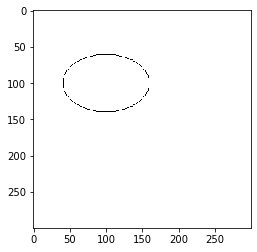

In [4]:
data1 = elipse(300, 300, [100, 100], 40, 60, 0)
plotted(data1, 'data1.png')

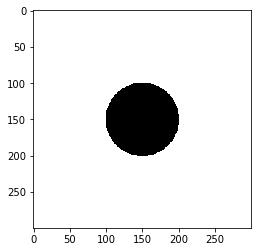

In [10]:
data2 = elipse(300, 300, [150, 150], 50, 50, 1)
plotted(data2, 'data2.png')

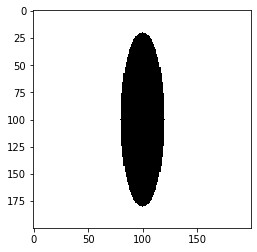

In [6]:
data3 = elipse(200, 200, [100, 100], 80, 20, 1)
plotted(data3, 'data3.png')

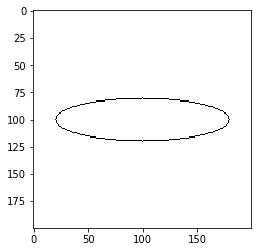

In [7]:
data4 = elipse(200, 200, [100, 100], 20, 80, 0)
plotted(data4, 'data4.png')

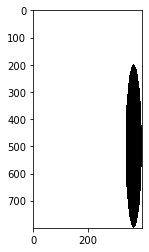

In [8]:
data5 = elipse(800, 400, [369, 499], 300, 30, 1)
plotted(data5, 'data5.png')

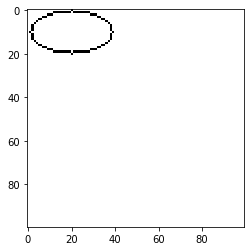

In [9]:
data6 = elipse(100, 100, [20, 10], 10, 19, 0)
plotted(data6, 'data6.png')